In [48]:
%matplotlib inline
import pandas as pd
import numpy as np

In [49]:
cn=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/cornwall2.csv')

In [50]:
cn.head()

,year,month,date,hour,o3,pm2.5,No2
0,2018,7,1,0,52,21,2.6
1,2018,7,1,1,50,20,1.6
2,2018,7,1,2,46,19,1.7
3,2018,7,1,3,42,19,1.6
4,2018,7,1,4,39,20,1.7


In [51]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9442 entries, 0 to 9441
Data columns (total 7 columns):
year     9442 non-null int64
month    9442 non-null int64
date     9442 non-null int64
hour     9442 non-null int64
o3       9442 non-null object
pm2.5    9442 non-null object
No2      9442 non-null object
dtypes: int64(4), object(3)
memory usage: 516.4+ KB


In [52]:
cn['Datetime']=pd.to_datetime(dict(year=cn.year, month=cn.month, day=cn.date))

In [53]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9442 entries, 0 to 9441
Data columns (total 8 columns):
year        9442 non-null int64
month       9442 non-null int64
date        9442 non-null int64
hour        9442 non-null int64
o3          9442 non-null object
pm2.5       9442 non-null object
No2         9442 non-null object
Datetime    9442 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 590.2+ KB


In [54]:
cols = cn.columns[cn.dtypes.eq('object')]
cn['pm2.5'] = cn['pm2.5'].apply(pd.to_numeric,errors = 'coerce')

In [55]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9442 entries, 0 to 9441
Data columns (total 8 columns):
year        9442 non-null int64
month       9442 non-null int64
date        9442 non-null int64
hour        9442 non-null int64
o3          9442 non-null object
pm2.5       9416 non-null float64
No2         9442 non-null object
Datetime    9442 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 590.2+ KB


Text(0, 0.5, '$PM2.5$ ($ug/m^3$)')

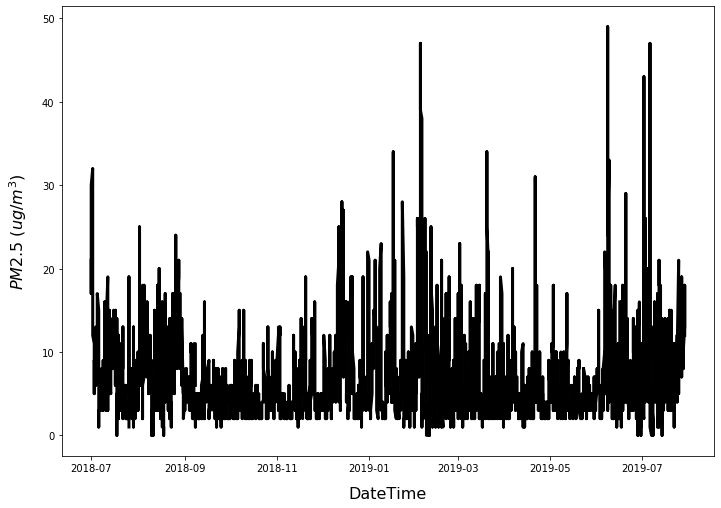

In [56]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)


ax1.plot(cn['Datetime'],cn['pm2.5'], 'k-', lw=3,label='Cornwall')

ax1.set_xlabel('DateTime',color='k',fontsize=16,labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)



In [57]:
box=pd.read_csv('https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/rooftop_server.csv')

In [58]:
box.head()

,2019-06-27 07:32:35,1,1561617116,3,4,6,7,7.1,6.1,7.2,...,27,1.1,0,0.1,0.00,2.23,0.02,1.28,21.31,66.06
0,2019-06-27 07:32:43,2,1561617124,3,4,5,6,6,5,6,...,25,0,0,0,0.00,0.00,0.24,2.63,21.34,65.70
1,2019-06-27 07:32:52,3,1561617133,3,4,4,5,5,4,5,...,27,0,0,0,0.95,0.00,0.02,4.76,21.38,65.41
2,2019-06-27 07:33:00,4,1561617141,3,4,4,5,6,4,5,...,22,1,1,0,6.59,0.00,0.02,1.14,21.44,65.15
3,2019-06-27 07:33:08,5,1561617149,3,4,5,6,7,5,6,...,28,3,1,0,0.00,0.04,0.24,0.72,21.48,64.94
4,2019-06-27 07:33:17,6,1561617158,3,4,4,5,6,4,5,...,20,3,1,0,0.00,0.00,0.02,4.92,21.51,64.77


In [59]:
box.columns = ['Date',"id","unix","hwpm2.5",'hwpm10','pm1.0std','pm2.5std','pm10std','pm1.0env','pm2.5env','pm10env',"0.3um","0.5um","1.0um","2.5um","5.0um","10um","shinyei","samyoung","exwind","inwind","temp","RH"]
box.head()

,Date,id,unix,hwpm2.5,hwpm10,pm1.0std,pm2.5std,pm10std,pm1.0env,pm2.5env,...,1.0um,2.5um,5.0um,10um,shinyei,samyoung,exwind,inwind,temp,RH
0,2019-06-27 07:32:43,2,1561617124,3,4,5,6,6,5,6,...,25,0,0,0,0.00,0.00,0.24,2.63,21.34,65.70
1,2019-06-27 07:32:52,3,1561617133,3,4,4,5,5,4,5,...,27,0,0,0,0.95,0.00,0.02,4.76,21.38,65.41
2,2019-06-27 07:33:00,4,1561617141,3,4,4,5,6,4,5,...,22,1,1,0,6.59,0.00,0.02,1.14,21.44,65.15
3,2019-06-27 07:33:08,5,1561617149,3,4,5,6,7,5,6,...,28,3,1,0,0.00,0.04,0.24,0.72,21.48,64.94
4,2019-06-27 07:33:17,6,1561617158,3,4,4,5,6,4,5,...,20,3,1,0,0.00,0.00,0.02,4.92,21.51,64.77


In [60]:
box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158858 entries, 0 to 158857
Data columns (total 23 columns):
Date        158858 non-null object
id          158858 non-null int64
unix        158858 non-null int64
hwpm2.5     158858 non-null int64
hwpm10      158858 non-null int64
pm1.0std    158858 non-null int64
pm2.5std    158858 non-null int64
pm10std     158858 non-null int64
pm1.0env    158858 non-null int64
pm2.5env    158858 non-null int64
pm10env     158858 non-null int64
0.3um       158858 non-null int64
0.5um       158858 non-null int64
1.0um       158858 non-null int64
2.5um       158858 non-null int64
5.0um       158858 non-null int64
10um        158858 non-null int64
shinyei     158858 non-null float64
samyoung    158858 non-null float64
exwind      158858 non-null float64
inwind      158319 non-null float64
temp        158858 non-null float64
RH          158858 non-null float64
dtypes: float64(6), int64(16), object(1)
memory usage: 27.9+ MB


In [61]:
box['Datetime']=pd.to_datetime(box['Date'])

Text(0, 0.5, '$PM2.5$ ($ug/m^3$)')

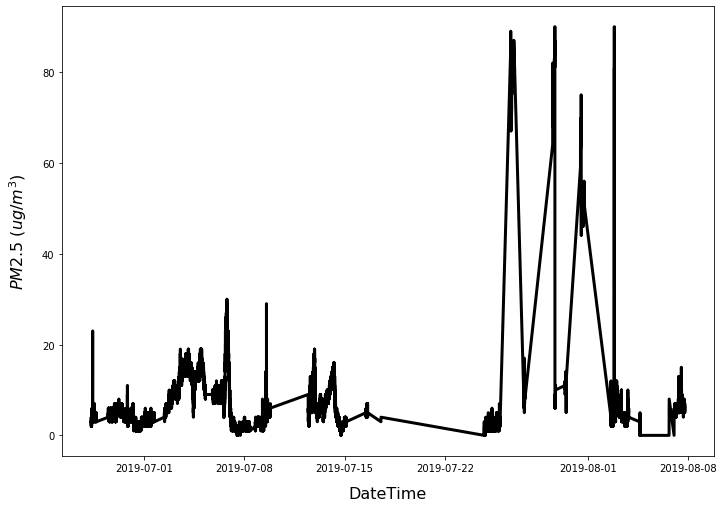

In [62]:
fig, ax1 = plt.subplots()
fig.set_size_inches(11.7, 8.27)


ax1.plot(box['Datetime'],box['hwpm2.5'], 'k-', lw=3,label='Roof Top')
ax1.set_xlabel('DateTime',color='k',fontsize=16,labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)



In [63]:
box.index=box['Datetime']
boxn=box.resample('1h').mean()
boxn=boxn.reset_index()

Text(0, 0.5, '$PM2.5$ ($ug/m^3$)')

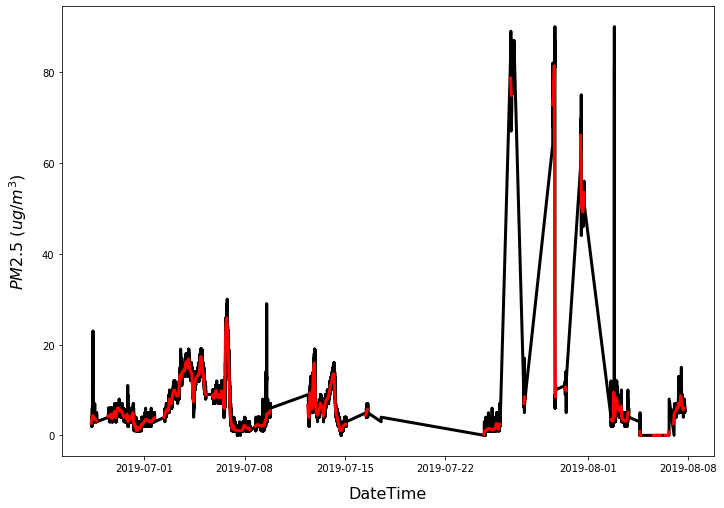

In [64]:
fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


ax1.plot(box['Datetime'],box['hwpm2.5'], 'k-', lw=3,label='Roof Top')
ax1.plot(boxn['Datetime'],boxn['hwpm2.5'], 'r-', lw=3,label='Roof Top Resampled')

ax1.set_xlabel('DateTime',color='k',fontsize=16,labelpad=13)
ax1.set_ylabel('$PM2.5$ ($ug/m^3$)',color='k',fontsize=16,labelpad=13)




In [65]:
cn = pd.merge_asof(boxn,cn[['Datetime','pm2.5']], on='Datetime', tolerance=pd.Timedelta("3 hours"), direction='nearest').fillna('NaN')

In [71]:
cols = cn.columns[cn.dtypes.eq('object')]
cn[cols] = cn[cols].apply(pd.to_numeric,errors = 'coerce')

In [72]:
cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 994
Data columns (total 24 columns):
Datetime    995 non-null datetime64[ns]
id          439 non-null float64
unix        439 non-null float64
hwpm2.5     439 non-null float64
hwpm10      439 non-null float64
pm1.0std    439 non-null float64
pm2.5std    439 non-null float64
pm10std     439 non-null float64
pm1.0env    439 non-null float64
pm2.5env    439 non-null float64
pm10env     439 non-null float64
0.3um       439 non-null float64
0.5um       439 non-null float64
1.0um       439 non-null float64
2.5um       439 non-null float64
5.0um       439 non-null float64
10um        439 non-null float64
shinyei     439 non-null float64
samyoung    439 non-null float64
exwind      439 non-null float64
inwind      439 non-null float64
temp        439 non-null float64
RH          439 non-null float64
pm2.5       224 non-null float64
dtypes: datetime64[ns](1), float64(23)
memory usage: 194.3 KB


In [75]:
cn = cn.dropna()

In [76]:
from matplotlib.ticker import FuncFormatter

def equidate_ax(fig, ax, dates, fmt="%m-%d %H:%M", label="Date"):  
    N = len(dates)
    def format_date(index, pos):
        index = np.clip(int(index + 0.5), 0, N - 1)
        return dates[index].strftime(fmt)
    ax.xaxis.set_major_formatter(FuncFormatter(format_date))
    ax.set_xlabel(label)
    fig.autofmt_xdate()
    
dates=cn['Datetime']
x = np.arange(len(dates))

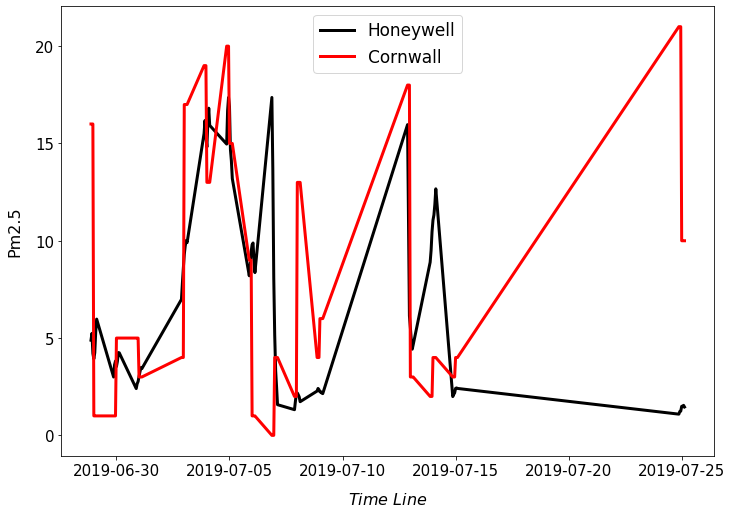

In [77]:
fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)


lns1=ax1.plot(cn['Datetime'],cn['hwpm2.5'], 'k-', lw=3,label='Honeywell')
lns2=ax1.plot(cn['Datetime'],cn['pm2.5'], 'r-', lw=3,label='Cornwall')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Pm2.5',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

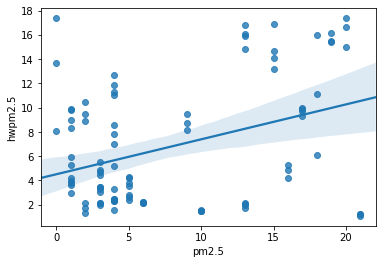

In [78]:
import seaborn as sns
ax = sns.regplot(x="pm2.5", y="hwpm2.5", data=cn)


In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import spearmanr, pearsonr
from sklearn.svm import SVR
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

In [80]:
ya=cn['pm2.5']
#xa=df[["hwpm2.5",'hwpm10','pm1.0std','pm2.5std','pm10std','pm1.0env','pm2.5env','pm10env',"0.3um","0.5um","1.0um","2.5um","5.0um","10um","shinyei","samyoung","exwind","inwind","temp","RH"]]
xa=cn[["hwpm2.5","exwind","temp","RH"]]

features = xa
targets = ya


X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=0)
rf.fit(X_train, y_train)


p= rf.predict(xa)

In [81]:
importances = rf.feature_importances_
importances

array([0.33850142, 0.34726385, 0.1669421 , 0.14729262])

<BarContainer object of 4 artists>

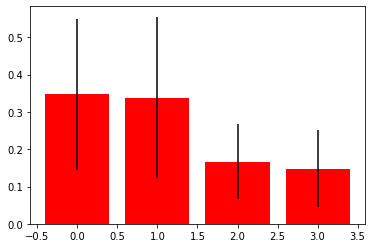

In [82]:
import numpy as np
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
plt.bar(range(xa.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

In [85]:
cn['p']=p
cn.head()

,Datetime,id,unix,hwpm2.5,hwpm10,pm1.0std,pm2.5std,pm10std,pm1.0env,pm2.5env,...,5.0um,10um,shinyei,samyoung,exwind,inwind,temp,RH,pm2.5,p
38,2019-06-28 21:00:00,7510.0,1.561754e+09,4.891765,5.891765,10.931765,13.825882,14.221176,10.931765,13.825882,...,0.428235,0.129412,1.667435,0.296565,0.780635,0.355082,23.961812,65.054682,16.0,9.20
39,2019-06-28 22:00:00,7934.0,1.561757e+09,5.241135,6.241135,12.508274,15.822695,16.333333,12.508274,15.822695,...,0.557920,0.141844,1.584019,0.202908,0.784775,0.670993,23.366005,68.244161,16.0,12.26
40,2019-06-28 23:00:00,8352.5,1.561761e+09,4.207729,5.207729,9.630435,12.091787,12.526570,9.630435,12.091787,...,0.456522,0.123188,1.550048,0.222077,1.101159,1.192585,22.329106,71.518986,16.0,14.00
41,2019-06-29 00:00:00,8769.0,1.561765e+09,3.928401,4.928401,8.897375,11.369928,11.868735,8.897375,11.369928,...,0.539379,0.147971,1.667375,0.189093,0.416850,1.986468,21.368496,76.115728,1.0,2.38
42,2019-06-29 01:00:00,9185.5,1.561768e+09,4.246377,5.246377,9.649758,12.463768,12.927536,9.649758,12.463768,...,0.502415,0.125604,1.471691,0.205676,0.767778,2.047367,21.191425,75.775411,1.0,8.98


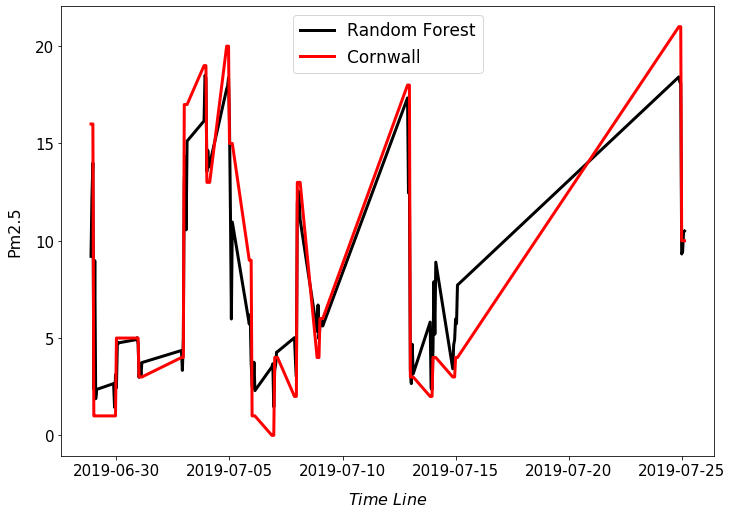

In [87]:

fig, ax1 = plt.subplots()

fig.set_size_inches(11.7, 8.27)




lns1=ax1.plot(cn['Datetime'],cn['p'], 'k-', lw=3,label='Random Forest')
lns2=ax1.plot(cn['Datetime'],cn['pm2.5'], 'r-', lw=3,label='Cornwall')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Pm2.5',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)

for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

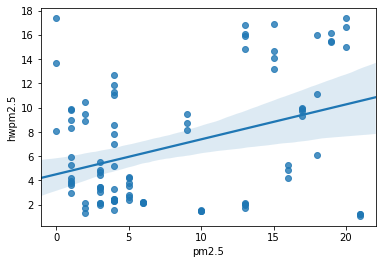

In [88]:
ax = sns.regplot(x="pm2.5", y="hwpm2.5", data=cn)

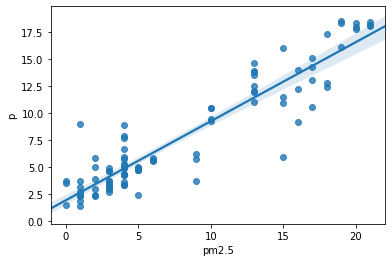

In [89]:
ax = sns.regplot(x="pm2.5", y="p", data=cn)

In [92]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

cn['cornwall']=cn['pm2.5']
cn['hw']=cn['hwpm2.5']


results = smf.ols('cornwall ~ hw', data=cn).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               cornwall   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     15.03
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           0.000195
Time:                        09:39:02   Log-Likelihood:                -312.15
No. Observations:                  97   AIC:                             628.3
Df Residuals:                      95   BIC:                             633.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6581      1.036      4.496      0.0

In [94]:
results = smf.ols('cornwall ~ p', data=cn).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               cornwall   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     613.0
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           3.23e-43
Time:                        09:39:23   Log-Likelihood:                -221.86
No. Observations:                  97   AIC:                             447.7
Df Residuals:                      95   BIC:                             452.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2401      0.442     -2.806      0.0